### Read MDA term 1 (Sep - Dec) 2019 Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,recall_score, make_scorer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.formula.api as smf
import seaborn as sns
import calmap as cmp
%matplotlib inline

In [2]:
mda_term1 = pd.read_csv(r'D:\MDA Stuff\Into_to_Data_Science\MDA_Term_1_csv.csv')
mda_term1.head()

,Course_Name,Task,Weightage_percent,Task_type,Due_Date,Total_Score,Score_obtained
0,Intro to DS,Project,30,Group_work,2019-12-06,100.0,85.0
1,Intro to DS,Midterm Exam,20,Exam,2019-10-17,130.0,107.0
2,Intro to DS,Assignment 10,5,Assignment,2019-12-02,10.0,9.0
3,Intro to DS,Assignment 9,5,Assignment,2019-11-25,10.0,10.0
4,Intro to DS,Assignment 8,5,Assignment,2019-12-05,10.0,10.0


### Overall MDA task distribution

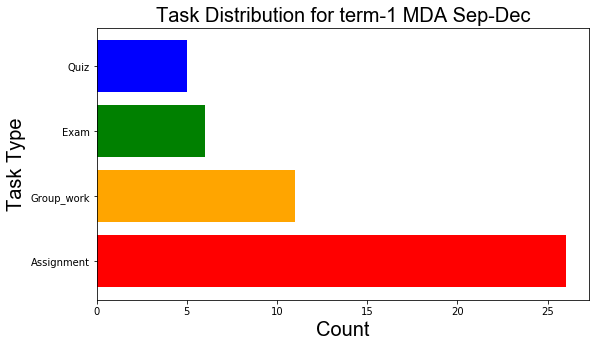

In [3]:
task_types = mda_term1.Task_type.unique()
task_color = ['red','orange','green','blue']
plt.figure(figsize=(30,5))
axis_font = {'fontname':'Arial', 'size':'20'}
plt.subplot(131)
plt.barh(mda_term1.Task_type.value_counts().index.tolist(), mda_term1.Task_type.value_counts(),color=task_color)
plt.title('Task Distribution for term-1 MDA Sep-Dec',**axis_font)
plt.xlabel('Count',**axis_font)
plt.ylabel('Task Type',**axis_font)
plt.show()

### Course-wise Task Distribution

In [4]:
data_sci = mda_term1.loc[mda_term1['Course_Name'] == 'Intro to DS']
ai = mda_term1.loc[mda_term1['Course_Name'] == 'AI I']
business_skill = mda_term1.loc[mda_term1['Course_Name'] == 'Business Skills DS']
database = mda_term1.loc[mda_term1['Course_Name'] == 'Database']
stats_model = mda_term1.loc[mda_term1['Course_Name'] == 'Stats Model 1']
stats_model.groupby(['Task_type']).count()['Task']
database.groupby(['Task_type']).count()['Task']

Task_type
Assignment    5
Exam          1
Group_work    6
Quiz          5
Name: Task, dtype: int64

In [5]:
df = mda_term1.groupby('Course_Name').Task_type.value_counts()
df

Course_Name         Task_type 
AI I                Assignment     3
                    Exam           2
Business Skills DS  Assignment     4
                    Group_work     4
Database            Group_work     6
                    Assignment     5
                    Quiz           5
                    Exam           1
Intro to DS         Assignment    10
                    Exam           1
                    Group_work     1
Stats Model 1       Assignment     4
                    Exam           2
Name: Task_type, dtype: int64

In [6]:
course_name = ['AI I','AI I','Business Skills DS','Business Skills DS','Database',
               'Database','Database','Database','Intro to DS','Intro to DS','Intro to DS',
               'Stats Model 1','Stats Model 1']
task_type = ['Assignment','Exam','Assignment','Group_work','Group_work','Assignment','Quiz','Exam','Assignment','Exam','Group_work','Assignment','Exam']
task_count = [3,2,4,4,6,5,5,1,10,1,1,4,2]

course_series = pd.Series(course_name)
task_type_series = pd.Series(task_type)
task_count_series = pd.Series(task_count)

new_df = {'Course_Name':course_series,'Task_type':task_type_series,'Task_count':task_count_series}
new_df = pd.DataFrame(new_df)

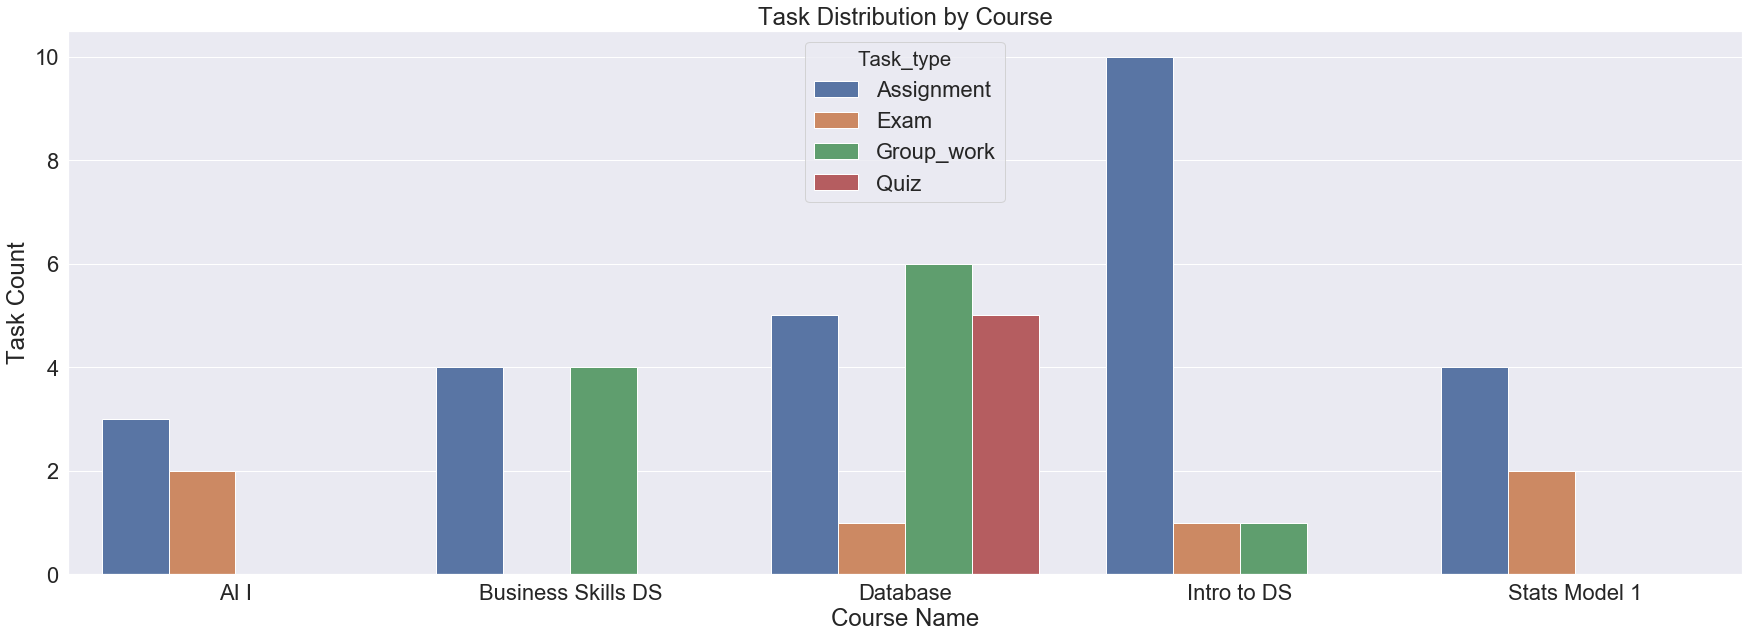

In [7]:
plt.figure(figsize=(30,10))
sns.set(font_scale=2)
sns.barplot(x="Course_Name", hue="Task_type", y="Task_count", data=new_df)
plt.title('Task Distribution by Course')
plt.xlabel('Course Name')
plt.ylabel('Task Count')
plt.show()

### Weightage of Different Task Types in Final Grade

In [8]:
df1 = mda_term1.iloc[:,2:4]
df1 = df1.groupby('Task_type',as_index=False)['Weightage_percent'].sum()
df1

,Task_type,Weightage_percent
0,Assignment,211
1,Exam,155
2,Group_work,102
3,Quiz,12


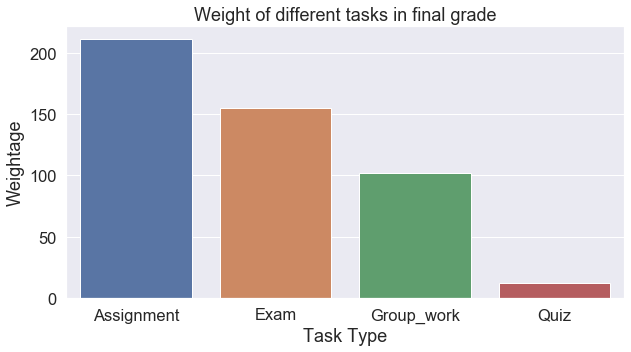

In [9]:
plt.figure(figsize=(10,5))
axis_font = {'fontname':'Arial', 'size':'20'}
sns.set(font_scale=1.5)
sns.barplot(x="Task_type", y="Weightage_percent", data=df1)
plt.title('Weight of different tasks in final grade')
plt.xlabel('Task Type')
plt.ylabel('Weightage')
plt.show()

### Total Marks for each Task type

In [10]:
df2 = mda_term1.iloc[:,3:6]
df2 = df2.drop('Due_Date',1)
df2 = df2.groupby('Task_type',as_index=False)['Total_Score'].sum()
df2

,Task_type,Total_Score
0,Assignment,645.0
1,Exam,357.0
2,Group_work,161.0
3,Quiz,102.0


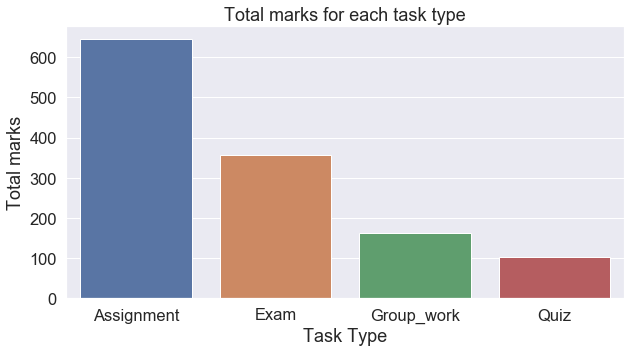

In [11]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.barplot(x="Task_type", y="Total_Score", data=df2)
plt.title('Total marks for each task type')
plt.xlabel('Task Type')
plt.ylabel('Total marks')
plt.show()

### Visualize marks obtained in assignments

In [12]:
assign_data = mda_term1.loc[mda_term1['Task_type'] == 'Assignment']
df3 = assign_data.iloc[:,5:]

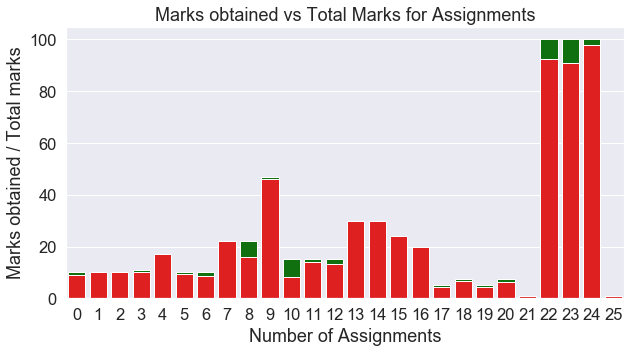

In [13]:
x_bins = np.arange(len(df3.index))
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
ax1 = sns.barplot(x=x_bins, y="Total_Score", data=df3,color="green")
sns.barplot(x=x_bins, y="Score_obtained", data=df3,color="red")
plt.title('Marks obtained vs Total Marks for Assignments')
plt.xlabel('Number of Assignments')
plt.ylabel('Marks obtained / Total marks')
plt.show()

### Visualize marks obtained in Exams

In [14]:
exam_data = mda_term1.loc[mda_term1['Task_type'] == 'Exam']
df4 = exam_data.iloc[:,5:]
df4

,Total_Score,Score_obtained
1,130.0,107.00
15,25.0,16.60
16,30.0,18.75
17,30.0,16.50
18,42.0,27.00
31,100.0,91.00


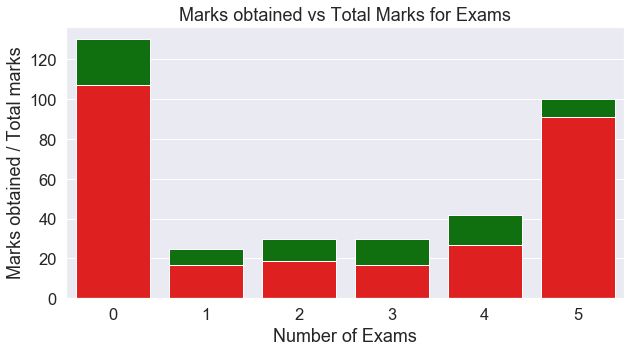

In [15]:
x_bins = np.arange(len(df4.index))
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.barplot(x=x_bins, y="Total_Score", data=df4,color="green")
sns.barplot(x=x_bins, y="Score_obtained", data=df4,color="red")
plt.title('Marks obtained vs Total Marks for Exams')
plt.xlabel('Number of Exams')
plt.ylabel('Marks obtained / Total marks')
plt.show()

### Visualize performance in the 5 courses for 1st term

In [16]:
ai_data = mda_term1.loc[mda_term1['Course_Name'] == 'AI I']
business_data = mda_term1.loc[mda_term1['Course_Name'] == 'Business Skills DS']
db_data = mda_term1.loc[mda_term1['Course_Name'] == 'Database']
ds_data = mda_term1.loc[mda_term1['Course_Name'] == 'Intro to DS']
stat_data = mda_term1.loc[mda_term1['Course_Name'] == 'Stats Model 1']

ai_total_score = ai_data['Total_Score'].sum()
bs_total_score = business_data['Total_Score'].sum()
db_total_score = db_data['Total_Score'].sum()
ds_total_score = ds_data['Total_Score'].sum()
stat_total_score = stat_data['Total_Score'].sum()
subj_tot_score = [ai_total_score, bs_total_score, db_total_score,ds_total_score,stat_total_score]

ai_obt_score = ai_data['Score_obtained'].sum()
bs_obt_score = business_data['Score_obtained'].sum()
db_obt_score = db_data['Score_obtained'].sum()
ds_obt_score = ds_data['Score_obtained'].sum()
stat_obt_score = stat_data['Score_obtained'].sum()
subj_obt_score = [ai_obt_score,bs_obt_score,db_obt_score,ds_obt_score,stat_obt_score]

course_names = ['AI I','Business Skills DS','Database','Intro to DS','Stats Model 1']

In [17]:
tot_score_series = pd.Series(subj_tot_score)
obt_score_series = pd.Series(subj_obt_score)

subj_df = {'Course_Name':course_names,'Total_Score':subj_tot_score,'Obtained_Score':subj_obt_score}
subj_df = pd.DataFrame(subj_df)
subj_df

,Course_Name,Total_Score,Obtained_Score
0,AI I,100.0,70.56
1,Business Skills DS,70.0,58.69
2,Database,520.0,482.06
3,Intro to DS,399.0,350.00
4,Stats Model 1,176.0,147.50


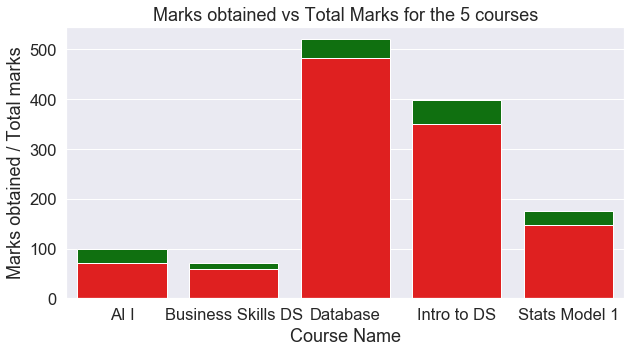

In [18]:
x_bins = np.arange(len(subj_df.index))
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
ax1 = sns.barplot(x="Course_Name", y="Total_Score", data=subj_df,color="green")
sns.barplot(x="Course_Name", y="Obtained_Score", data=subj_df,color="red")
plt.title('Marks obtained vs Total Marks for the 5 courses')
plt.xlabel('Course Name')
plt.ylabel('Marks obtained / Total marks')
plt.show()

### Visualizing using time series methodology

In [19]:
mda_term1.dtypes
mda_term1['Due_Date'] = mda_term1['Due_Date'].astype('datetime64[ns]')

In [20]:
mda_term1 = mda_term1.set_index('Due_Date')
mda_term1.head(3)

,Course_Name,Task,Weightage_percent,Task_type,Total_Score,Score_obtained
Due_Date,,,,,,
2019-12-06,Intro to DS,Project,30,Group_work,100.0,85.0
2019-10-17,Intro to DS,Midterm Exam,20,Exam,130.0,107.0
2019-12-02,Intro to DS,Assignment 10,5,Assignment,10.0,9.0


In [21]:
mda_term1['Year'] = mda_term1.index.year
mda_term1['Month'] = mda_term1.index.month
mda_term1['Weekday Name'] = mda_term1.index.weekday_name

mda_term1.sample(5, random_state=0)

,Course_Name,Task,Weightage_percent,Task_type,Total_Score,Score_obtained,Year,Month,Weekday Name
Due_Date,,,,,,,,,
2019-10-17,Business Skills DS,Presentation Stats,10,Assignment,5.0,4.50,2019,10,Thursday
2019-12-05,Intro to DS,Assignment 8,5,Assignment,10.0,10.00,2019,12,Thursday
2019-10-17,Business Skills DS,Presentation Western,10,Assignment,5.0,4.25,2019,10,Thursday
2019-10-18,Business Skills DS,Delisle Report,15,Assignment,7.5,6.19,2019,10,Friday
2019-10-27,Database,Write PHP code,1,Assignment,1.0,1.00,2019,10,Sunday


In [22]:
mda_term1.loc['2019-10-27']

,Course_Name,Task,Weightage_percent,Task_type,Total_Score,Score_obtained,Year,Month,Weekday Name
Due_Date,,,,,,,,,
2019-10-27,Database,Write PHP code,1,Assignment,1.0,1.0,2019,10,Sunday


### Visualize work load of course from September to December

In [23]:
sep_data = mda_term1.loc['2019-09']
oct_data = mda_term1.loc['2019-10']
nov_data = mda_term1.loc['2019-11']
dec_data = mda_term1.loc['2019-12']

sep_count = len(sep_data.index)
oct_count = len(oct_data.index)
nov_count = len(nov_data.index)
dec_count = len(dec_data.index)

month_work_load = [sep_count,oct_count,nov_count,dec_count]
months = ['September','October','November','December']


In [24]:
work_series = pd.Series(month_work_load)
month_series = pd.Series(months)

month_df = {'Month_Name':month_series,'Task_count':work_series}
month_df = pd.DataFrame(month_df)
month_df

,Month_Name,Task_count
0,September,6
1,October,20
2,November,13
3,December,9


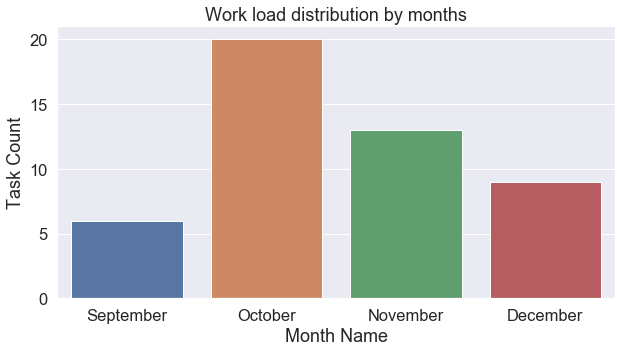

In [25]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.barplot(x="Month_Name", y="Task_count", data=month_df)
plt.title('Work load distribution by months')
plt.xlabel('Month Name')
plt.ylabel('Task Count')
plt.show()

### Visualize performance across months from September to December

In [26]:
sep_total_score = sep_data['Total_Score'].sum()
oct_total_score = oct_data['Total_Score'].sum()
nov_total_score = nov_data['Total_Score'].sum()
dec_total_score = dec_data['Total_Score'].sum()
tot_score = [sep_total_score,oct_total_score,nov_total_score,dec_total_score]

sep_obt_score = sep_data['Score_obtained'].sum()
oct_obt_score = oct_data['Score_obtained'].sum()
nov_obt_score = nov_data['Score_obtained'].sum()
dec_obt_score = dec_data['Score_obtained'].sum()
obt_score = [sep_obt_score,oct_obt_score,nov_obt_score,dec_obt_score]



In [27]:
tot_score_series = pd.Series(tot_score)
obt_score_series = pd.Series(obt_score)

performance_df = {'Month_Name':month_series,'Total_Score':tot_score_series,'Obtained_Score':obt_score_series}
performance_df = pd.DataFrame(performance_df)
performance_df

,Month_Name,Total_Score,Obtained_Score
0,September,116.0,108.00
1,October,467.0,405.62
2,November,277.0,233.81
3,December,405.0,361.38


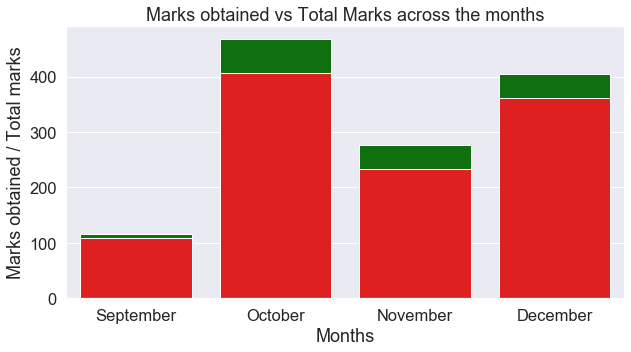

In [28]:
x_bins = np.arange(len(performance_df.index))
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
ax1 = sns.barplot(x="Month_Name", y="Total_Score", data=performance_df,color="green")
sns.barplot(x="Month_Name", y="Obtained_Score", data=performance_df,color="red")
plt.title('Marks obtained vs Total Marks across the months')
plt.xlabel('Months')
plt.ylabel('Marks obtained / Total marks')
plt.show()

### Visualize the due dates for tasks

In [29]:
due_date = mda_term1.iloc[:,:0]
due_date = due_date.sort_values(by='Due_Date')